<b>

<p>
<center>
<font size="6">
Mini-Project: Analysing and Predicting Life Expectancy
</font>
</center>
</p>

<p>
<center>
<font size="4">
SC1015: Data Science and Artifial Intelligence, Nanyang Technological University
</font>
</center>
</p>

</b>

<p>
<center>
<font size="3">
<em>Done By: Chan Kit Ho and Chiang Qin Zhi</em>
</font>
</center>
</p>



In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, classification_report, mean_squared_error,r2_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_graphviz



# **Part 1: Data Cleaning and Preparation**

First, we import the dataset from a .csv file into a Pandas DataFrame and explore the dataset.

In [91]:
LifeData = pd.read_csv('Life-Expectancy-Data-Updated.csv')
LifeData

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


The description of the dataset is as available below:  
>**Year** : Years observed from 2000 to 2015  
>**Infant_deaths** : Represents infant deaths per 1000 population  
>**Under_five_deaths** : Represents deaths of children under five years old per 1000 population  
>**Adult_mortality** : Represents deaths of adults per 1000 population  
>**Alcohol_consumption** : Represents alcohol consumption that is recorded in liters of pure alcohol per capita with 15+ years old  
>**Hepatitis_B** : Represents % of coverage of Hepatitis B (HepB3) immunization among 1-year-olds.  
>**Measles** : Represents % of coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds  
>**BMI** : BMI is a measure of nutritional status in adults. It is defined as a person's weight in kilograms divided by the square of that person's height in meters (kg/m2)  
>**Polio** : Represents % of coverage of Polio (Pol3) immunization among 1-year-olds.  
>**Diphtheria** : Represents % of coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds.  
>**Incidents_HIV** : Incidents of HIV per 1000 population aged 15-49  
>**GDP_per_capita** : GDP per capita in current USD  
>**Population_mln** : Total population in millions  
>**Thinness_ten_nineteen_years** : Prevalence of thinness among adolescents aged 10-19 years. BMI < -2 standard deviations below the median.  
>**Thinness_five_nine_years** : Prevalence of thinness among children aged 5-9 years. BMI < -2 standard deviations below the median.  
>**Schooling** : Average years that people aged 25+ spent in formal education  
>**Economy_status_Developed** : Developed country  
>**Economy_status_Developing** : Developing county  
>**Life_expectancy** : Average life expectancy of both genders in different years from 2010 to 2015  

We then check for the number of variables, type of variables and presence of any empty cells.

In [92]:
print("Life Expectancy Dataset Shape:", LifeData.shape, "\n")
print("Dataset Variable Types:\n",LifeData.dtypes)

Life Expectancy Dataset Shape: (2864, 21) 

Dataset Variable Types:
 Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object


In [93]:
print("Empty Entry Count:\n",LifeData.isna().sum())

Empty Entry Count:
 Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64


We observe that there are **2864 entries** with **22 columns**. There are **no empty entries** to be cleaned.

Analysing the variables, we note that the following variables - **Hepatitis B, Measles, Polio and Diphtheria** reflect the immunization coverage among 1-year-olds (%), we will group these variables into one single variable **"Essential Immunization"**, which reflects the essential immunization coverage among 1-year-olds (%), for simplistic sake.

In [94]:
#Define a new df for data cleaning and preparation
LifeData_Clean = pd.DataFrame(LifeData)
LifeData_Clean["Essential_Immunization"] = round((LifeData_Clean["Hepatitis_B"] + LifeData_Clean["Polio"] + LifeData_Clean["Diphtheria"] + LifeData_Clean["Measles"]) / 4,1)
# Drop the individual columns for Hepatitis B, Polio, and Diphtheria
LifeData_Clean.drop(["Hepatitis_B", "Polio", "Diphtheria","Measles"], axis=1, inplace=True)
LifeData_Clean.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,BMI,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Essential_Immunization
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,27.8,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5,89.0
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,26.0,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8,96.2
2,India,Asia,2007,51.5,67.9,201.0765,1.57,21.2,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4,56.5
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,25.3,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0,88.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,27.0,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7,93.5


We also note that   
1. **Infant_deaths** is in fact, a subset of **Under_five_deaths**, considering that **Under_five_deaths** represents the deaths of children under five years old per 1000 population.  
   
2. **Economy_status_Developing** is a inverse of **Economy_status_Developed**, since it is a binary categorical data.  
  
Hence, we will drop **Infant_deaths** and **Economy_status_Developing** from the dataframe.

In [95]:
LifeData_Clean.drop(["Infant_deaths","Economy_status_Developing"], axis=1, inplace=True)
LifeData_Clean.head()

,Country,Region,Year,Under_five_deaths,Adult_mortality,Alcohol_consumption,BMI,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Life_expectancy,Essential_Immunization
0,Turkiye,Middle East,2015,13.0,105.8240,1.32,27.8,0.08,11006,78.53,4.9,4.8,7.8,0,76.5,89.0
1,Spain,European Union,2015,3.3,57.9025,10.35,26.0,0.09,25742,46.44,0.6,0.5,9.7,1,82.8,96.2
2,India,Asia,2007,67.9,201.0765,1.57,21.2,0.13,1076,1183.21,27.1,28.0,5.0,0,65.4,56.5
3,Guyana,South America,2006,40.5,222.1965,5.68,25.3,0.79,4146,0.75,5.7,5.5,7.9,0,67.0,88.0
4,Israel,Middle East,2012,4.3,57.9510,2.89,27.0,0.08,33995,7.91,1.2,1.1,12.8,1,81.7,93.5


This is the final variables that we will work with after preapration and cleaning.

In [96]:
print("Dataset Variable Types:\n",LifeData_Clean.dtypes)

Dataset Variable Types:
 Country                         object
Region                          object
Year                             int64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
BMI                            float64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Life_expectancy                float64
Essential_Immunization         float64
dtype: object


---
# **Part 2: Exploratory Data Analysis (EDA)**

As there still many variables, we can check the correlation of the other predictor variables with the response variable, Life Expectancy, to determine which variables to focus on. 

This is because, in later section, using too many variables may result in overfitting for our models. Though R^2 will increase by virtue of adding more variables, Adjusted R^2 which accounts for number of predictors will be affected.

In [97]:
#Key statistical description of the variables
LifeData_Clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2864.0,2007.500000,4.610577,2000.000,2003.75000,2007.5000,2011.250000,2015.0000
Under_five_deaths,2864.0,42.938268,44.569974,2.300,9.67500,23.1000,66.000000,224.9000
Adult_mortality,2864.0,192.251775,114.910281,49.384,106.91025,163.8415,246.791375,719.3605
Alcohol_consumption,2864.0,4.820882,3.981949,0.000,1.20000,4.0200,7.777500,17.8700
BMI,2864.0,25.032926,2.193905,19.800,23.20000,25.5000,26.400000,32.1000
Incidents_HIV,2864.0,0.894288,2.381389,0.010,0.08000,0.1500,0.460000,21.6800
GDP_per_capita,2864.0,11540.924930,16934.788931,148.000,1415.75000,4217.0000,12557.000000,112418.0000
Population_mln,2864.0,36.675915,136.485867,0.080,2.09750,7.8500,23.687500,1379.8600
Thinness_ten_nineteen_years,2864.0,4.865852,4.438234,0.100,1.60000,3.3000,7.200000,27.7000
Thinness_five_nine_years,2864.0,4.899825,4.525217,0.100,1.60000,3.4000,7.300000,28.6000


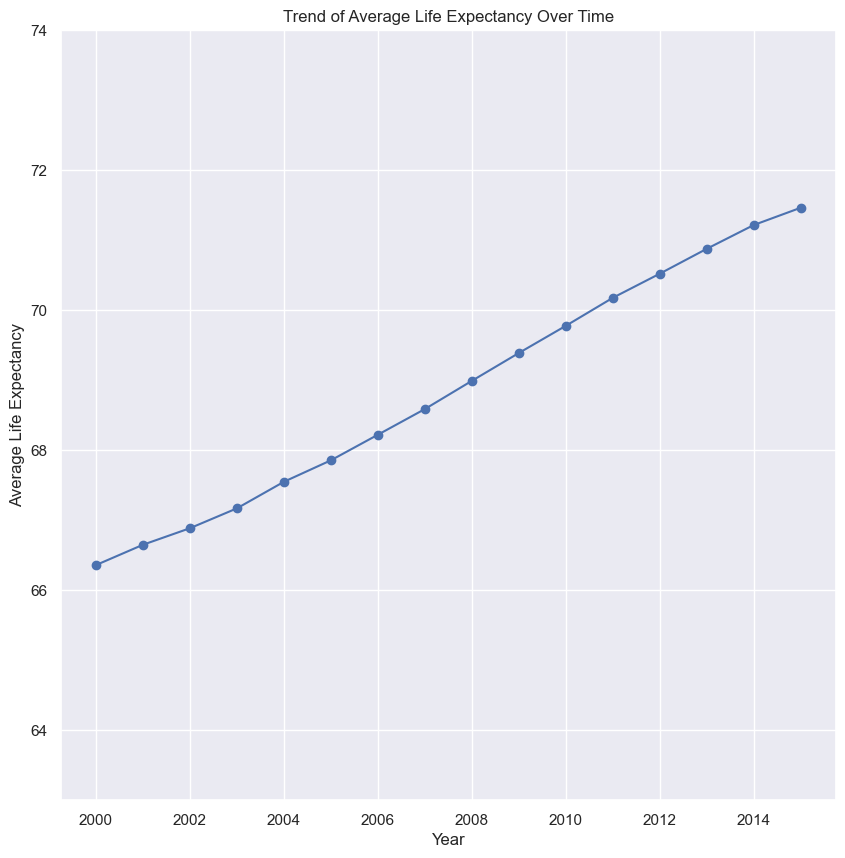

Year
2000    66.360335
2001    66.650279
2002    66.886592
2003    67.170391
2004    67.549721
2005    67.856425
2006    68.221788
2007    68.588268
2008    68.991061
2009    69.388827
2010    69.777095
2011    70.177095
2012    70.521788
2013    70.877095
2014    71.216760
2015    71.463687
Name: Life_expectancy, dtype: float64


In [98]:
# Group the data by year and calculate the mean life expectancy for each year
yearly_mean = LifeData_Clean.groupby('Year')['Life_expectancy'].mean()

# Plotting the resulting data
plt.plot(yearly_mean.index, yearly_mean.values,'o-')
plt.title('Trend of Average Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.ylim([63,74])
plt.show()

print(yearly_mean)

We plotted the graph of average Life Expectancy over the 15 year period. We note a significant increase in the life expectancy.

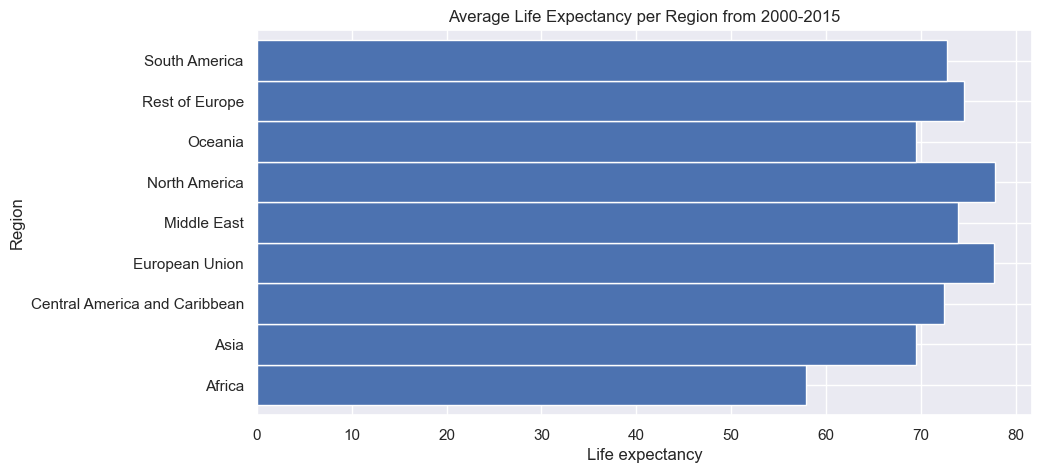

Region
Africa                           57.847304
Asia                             69.454861
Central America and Caribbean    72.437500
European Union                   77.715046
Middle East                      73.975446
North America                    77.841667
Oceania                          69.517614
Rest of Europe                   74.525417
South America                    72.780729
Name: Life_expectancy, dtype: float64


In [99]:
#Group the data by Region and calculate the mean life expectancy for each region
avg_life_expectancies = LifeData_Clean.groupby('Region').Life_expectancy.mean()
avg_life_expectancies.columns =['Region', 'Life Expectancy']

#Plotting the resulting data
fig = plt.figure(figsize=(10, 5))
avg_life_expectancies.plot(kind="barh",width=1)
plt.xlabel("Life expectancy")
plt.title("Average Life Expectancy per Region from 2000-2015")
plt.show()
print(avg_life_expectancies)

However, when we plot a bar graph of Life Expectancy based on region, we note that there exist a significant disparity amongst the different regions.  
  
Africa has an average Life Expectancy of 57.8 while North America has 77.8. This is a 20 year difference in life expectancy.

In [100]:
#Checking the number of unique countries in the data set
len(LifeData_Clean["Country"].unique())

179

There exists data from **179 Unique Countries** with 15 years of entries each (179*15 = 2685)

In [101]:
#Creating a DataFrame for storing individual Countries
Countries_by_region=pd.DataFrame(LifeData_Clean[["Region","Country","Economy_status_Developed"]]).drop_duplicates()
Countries_by_region

,Region,Country,Economy_status_Developed
0,Middle East,Turkiye,0
1,European Union,Spain,1
2,Asia,India,0
3,South America,Guyana,0
4,Middle East,Israel,1
...,...,...,...
688,Middle East,Qatar,0
698,Oceania,Fiji,0
754,Oceania,Australia,1
1204,Rest of Europe,North Macedonia,0


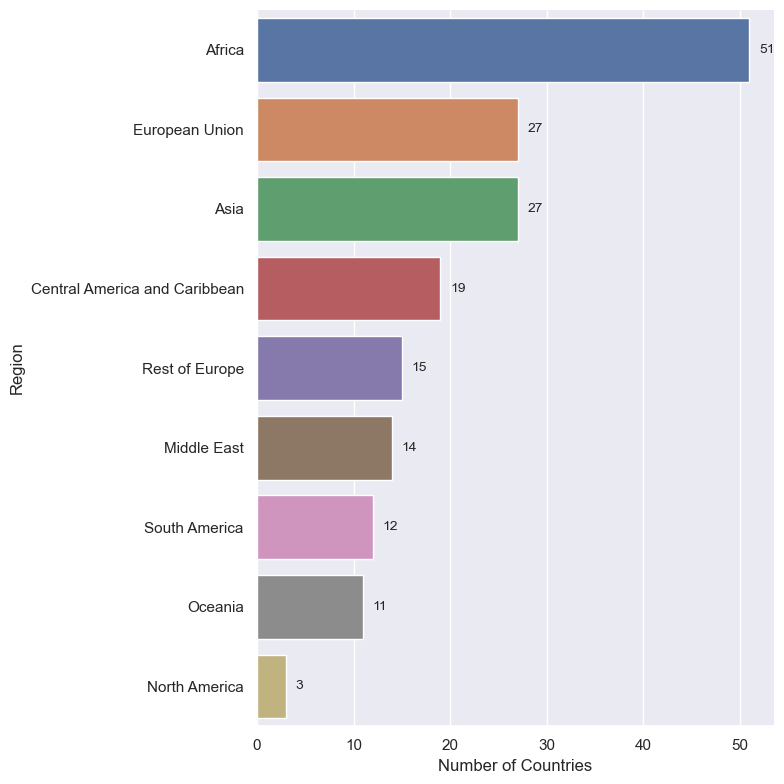

In [102]:
#Plotting a catplot for country count based on region
g=sb.catplot(y='Region', data=Countries_by_region, kind='count', height=8, 
           order=Countries_by_region['Region'].value_counts().index)
plt.xlabel("Number of Countries")

region_counts = Countries_by_region['Region'].value_counts()

for i, count in enumerate(region_counts):
    g.ax.text(count + 1, i, str(count), ha='left', va='center', fontsize=10)

plt.show()

We note a large number of data collected from Countries in **Africa**, at 51 Countries.  
**North America** has the least, at 3 Countries.

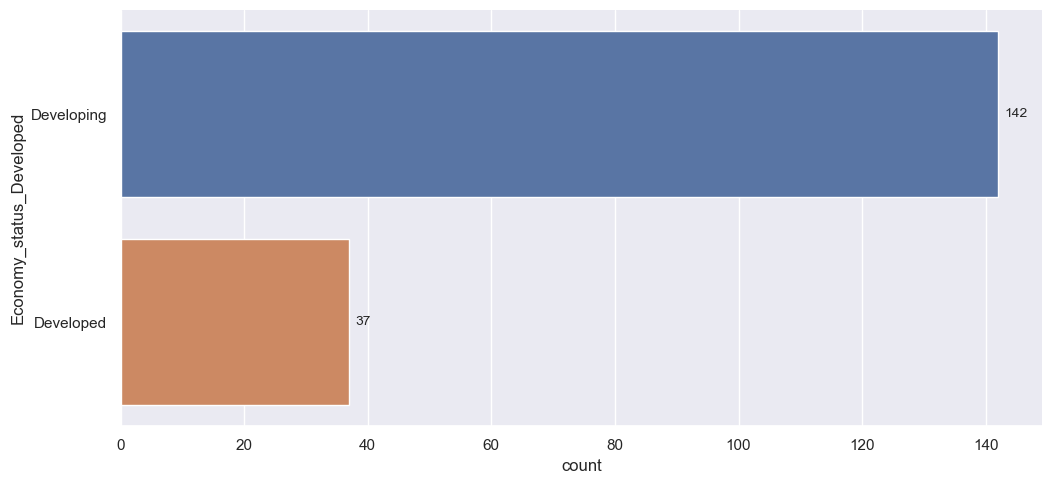

In [103]:
#Plotting a catplot for country count based on economy status
h = sb.catplot(y='Economy_status_Developed', data=Countries_by_region, kind='count', height=5, aspect=2,
               order=LifeData_Clean['Economy_status_Developed'].value_counts().index).set_yticklabels(['Developing', 'Developed'])

Status_counts = Countries_by_region['Economy_status_Developed'].value_counts()

for i, count in enumerate(Status_counts):
    h.ax.text(count + 1, i, str(count), ha='left', va='center', fontsize=10)

plt.show()

We note a large number of data collected from **Developing Countries**, at 142 Countries.  
  
We then check for **correlation of variables** and plot the **heatmap**.

In [104]:
LifeData_Clean.corr()

,Year,Under_five_deaths,Adult_mortality,Alcohol_consumption,BMI,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Life_expectancy,Essential_Immunization
Year,1.000000e+00,-0.176393,-0.158660,-0.000611,0.161422,-0.081743,0.040998,0.015158,-0.044901,-0.048038,0.150539,-5.026601e-15,0.174359,0.158469
Under_five_deaths,-1.763926e-01,1.000000,0.802361,-0.409367,-0.665255,0.369618,-0.469682,-0.005234,0.466978,0.450756,-0.773196,-4.271342e-01,-0.920419,-0.723690
Adult_mortality,-1.586596e-01,0.802361,1.000000,-0.244794,-0.522866,0.699119,-0.510121,-0.053848,0.382140,0.379792,-0.581035,-4.293748e-01,-0.945360,-0.525637
Alcohol_consumption,-6.105222e-04,-0.409367,-0.244794,1.000000,0.284032,-0.034118,0.443966,-0.039119,-0.446366,-0.433030,0.615728,6.703661e-01,0.399159,0.321396
BMI,1.614225e-01,-0.665255,-0.522866,0.284032,1.000000,-0.161142,0.336180,-0.166482,-0.596483,-0.599112,0.635475,2.432870e-01,0.598423,0.483133
Incidents_HIV,-8.174257e-02,0.369618,0.699119,-0.034118,-0.161142,1.000000,-0.169590,-0.058040,0.188765,0.193847,-0.201246,-1.756352e-01,-0.553027,-0.153823
GDP_per_capita,4.099817e-02,-0.469682,-0.510121,0.443966,0.336180,-0.169590,1.000000,-0.040839,-0.375270,-0.381032,0.580626,6.675469e-01,0.583090,0.324484
Population_mln,1.515762e-02,-0.005234,-0.053848,-0.039119,-0.166482,-0.058040,-0.040839,1.000000,0.256322,0.258486,-0.033562,-3.530183e-02,0.026298,-0.073499
Thinness_ten_nineteen_years,-4.490053e-02,0.466978,0.382140,-0.446366,-0.596483,0.188765,-0.375270,0.256322,1.000000,0.938757,-0.571485,-4.160977e-01,-0.467824,-0.344821
Thinness_five_nine_years,-4.803775e-02,0.450756,0.379792,-0.433030,-0.599112,0.193847,-0.381032,0.258486,0.938757,1.000000,-0.551376,-4.148673e-01,-0.458166,-0.351153


Heatmap for easier visualisation.

<AxesSubplot:>

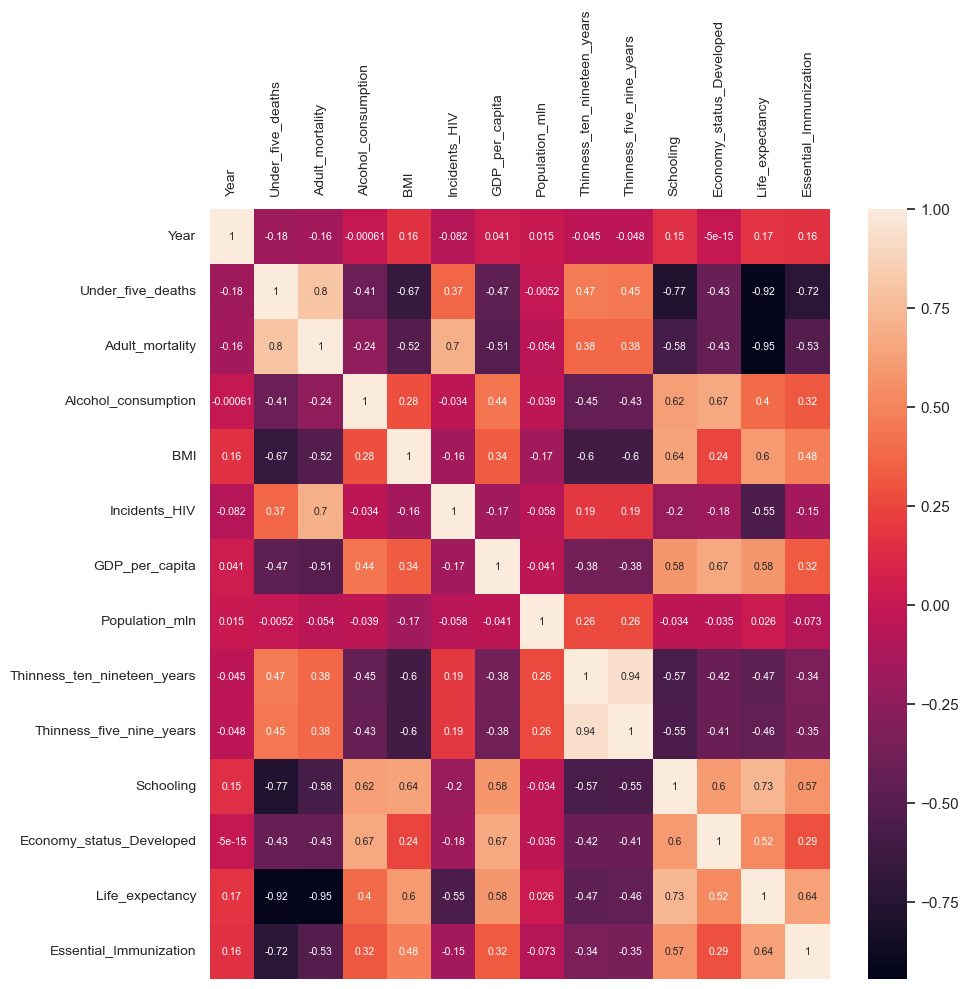

In [105]:
sb.set (rc = {'figure.figsize':(10, 10)})
plt.tick_params(labelsize=10, labelbottom = False, labeltop=True)
sb.heatmap(LifeData_Clean.corr(), annot = True, annot_kws={"fontsize":7.5})

Looking at the heatmap,  
Life Expectancy (target variable) appears to be relatively highly correlated (negatively or positively) with:   
  
**Under five deaths (negative)**   
**Adult Mortality (negative)**    
**BMI (positive)**    
**GDP Per Capita (positive)**  
**Schooling (positive)**  
**Essential Immunization (positive)**    
  
We will hence focus on analysing this 6 variables.
  
**Population Count** has the lowest correlation, at 0.026. This is likely because population size may vary widely between countries with similar levels of life expectancy.

We will now visualise the variables with the use of **boxplot, histogram and violinplot.**

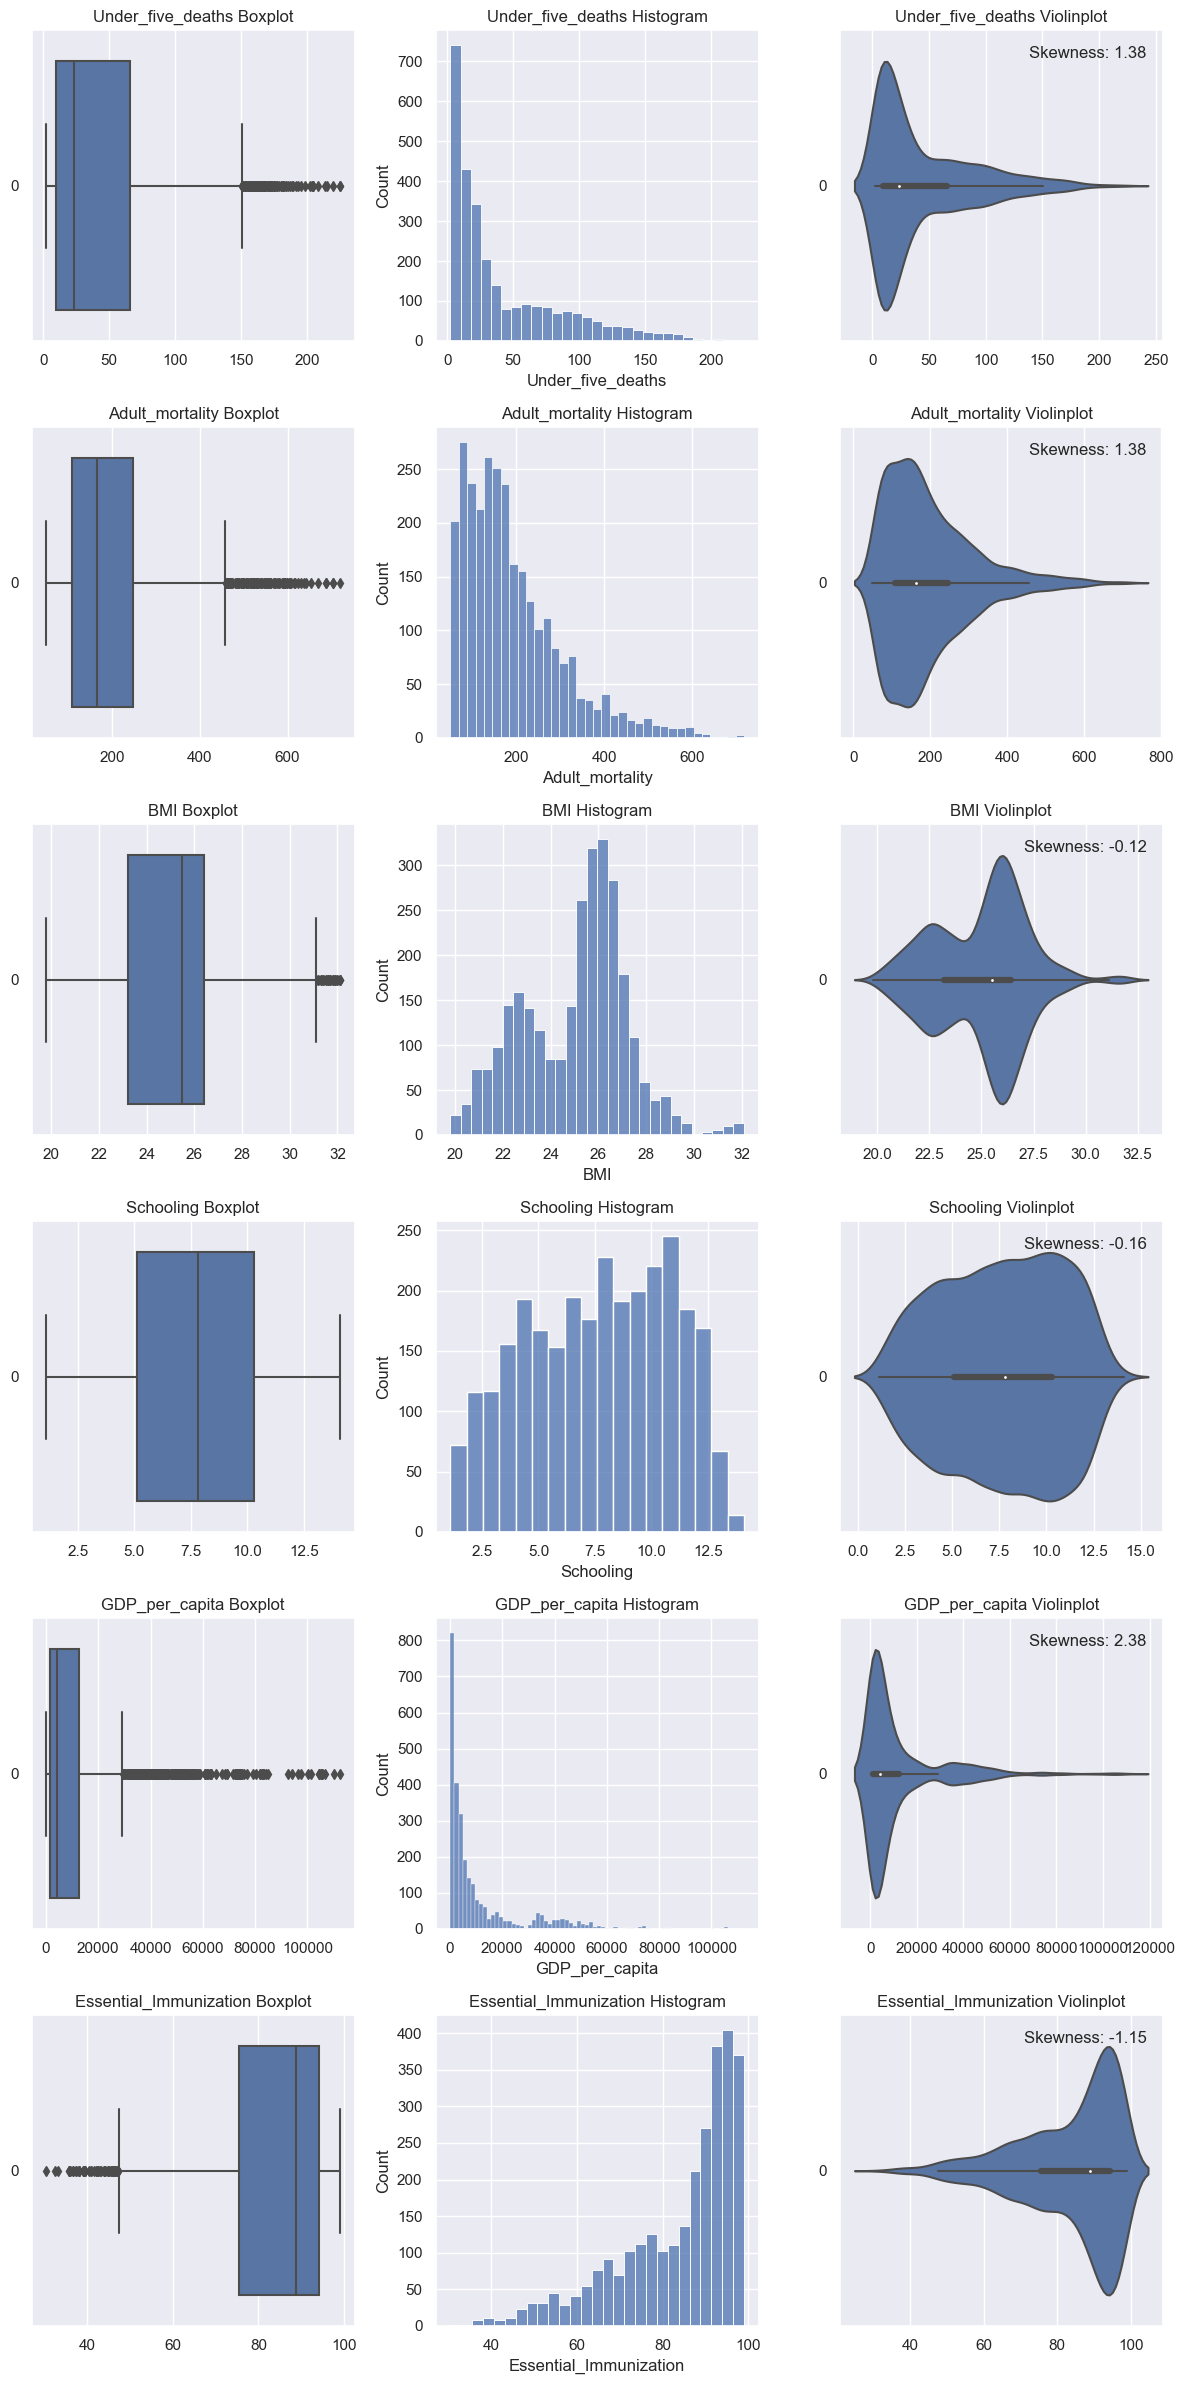

In [106]:
LifeData_Variables = pd.DataFrame(LifeData_Clean[['Under_five_deaths', 'Adult_mortality', 'BMI', 'Schooling','GDP_per_capita', 'Essential_Immunization']])

# Create a grid of subplots with 3 columns and n rows
n = len(LifeData_Variables.columns)
fig, axes = plt.subplots(nrows=n, ncols=3, figsize=(12, 4*n))

# Loop through each numeric variable and create plots
count = 0
for var in LifeData_Variables:
    sb.boxplot(data = LifeData_Variables[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = LifeData_Variables[var], ax = axes[count,1])
    sb.violinplot(data = LifeData_Variables[var], orient = "h", ax = axes[count,2])
    axes[count,0].set_title(f"{var} Boxplot")
    axes[count,1].set_title(f"{var} Histogram")
    axes[count,2].set_title(f"{var} Violinplot")
    axes[count,2].text(0.95, 0.95, f"Skewness: {LifeData_Variables[var].skew():.2f}", transform=axes[count,2].transAxes, ha='right', va='top')
    count += 1

plt.tight_layout()
plt.show()

We observe that there are high anomaly rates for **under five deaths** and **adult mortality**. This indicates that the majority of countries do not experience high adult mortality and under five deaths, but for a small minority of countries, these issues are very severe.  
  
The anomaly rates for **GDP per capita** however, is exceptionally high, (with skewness at 2.38). This is indicative of the larger proportion of developing countries, and the larger magnitude of GDP per capita in general. As such, we will be doing a log transformation to reduce the skewness and bring the distribution closer to a normal distribution.

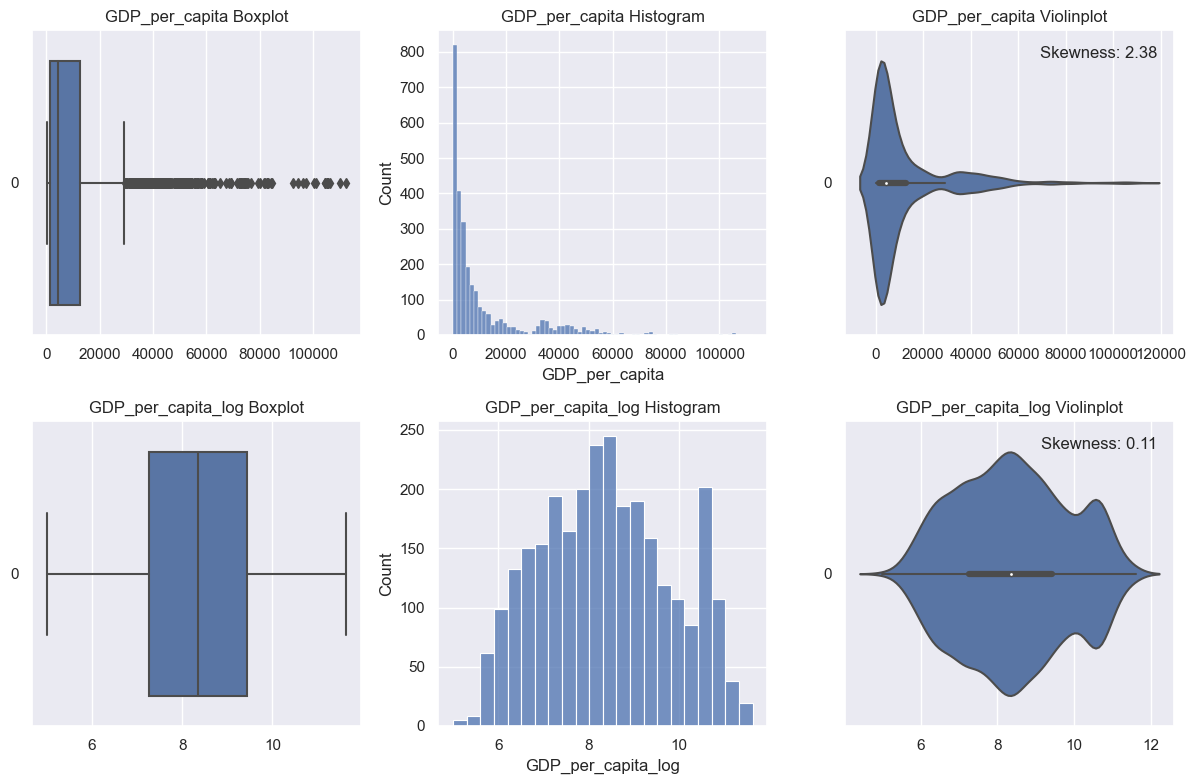

In [107]:
#Creating a new Dataframe to store pre-log transformed data and log transformed data.
LifeData_Variables['GDP_per_capita_log'] = np.log(LifeData_Variables['GDP_per_capita'])
LifeDataGDPComparison = pd.DataFrame(LifeData_Variables[['GDP_per_capita','GDP_per_capita_log']])

# Create a grid of subplots with 3 columns and n rows
n = len(LifeDataGDPComparison.columns)
fig, axes = plt.subplots(nrows=n, ncols=3, figsize=(12, 4*n))

# Loop through each variable and create plots
count = 0
for var in LifeDataGDPComparison:
    sb.boxplot(data = LifeDataGDPComparison[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = LifeDataGDPComparison[var], ax = axes[count,1])
    sb.violinplot(data = LifeDataGDPComparison[var], orient = "h", ax = axes[count,2])
    axes[count,0].set_title(f"{var} Boxplot")
    axes[count,1].set_title(f"{var} Histogram")
    axes[count,2].set_title(f"{var} Violinplot")
    axes[count,2].text(0.95, 0.95, f"Skewness: {LifeData_Variables[var].skew():.2f}", transform=axes[count,2].transAxes, ha='right', va='top')
    count += 1
plt.tight_layout()
plt.show()

From observation, we note that log transformation did reduce the skewness and bring the distribution closer to normal distribution. As such, we will replace the data in LifeData_Clean with the log adjusted values.

In [108]:
LifeData_Clean['GDP_per_capita'] = LifeData_Variables['GDP_per_capita_log']
LifeData_Clean

,Country,Region,Year,Under_five_deaths,Adult_mortality,Alcohol_consumption,BMI,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Life_expectancy,Essential_Immunization
0,Turkiye,Middle East,2015,13.0,105.8240,1.320,27.8,0.08,9.306196,78.53,4.9,4.8,7.8,0,76.5,89.0
1,Spain,European Union,2015,3.3,57.9025,10.350,26.0,0.09,10.155879,46.44,0.6,0.5,9.7,1,82.8,96.2
2,India,Asia,2007,67.9,201.0765,1.570,21.2,0.13,6.981006,1183.21,27.1,28.0,5.0,0,65.4,56.5
3,Guyana,South America,2006,40.5,222.1965,5.680,25.3,0.79,8.329899,0.75,5.7,5.5,7.9,0,67.0,88.0
4,Israel,Middle East,2012,4.3,57.9510,2.890,27.0,0.08,10.433969,7.91,1.2,1.1,12.8,1,81.7,93.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,224.9,291.8240,0.092,20.8,0.49,5.988961,11.33,12.8,12.9,1.1,0,49.9,52.8
2860,Mongolia,Asia,2009,28.6,235.2330,6.560,25.3,0.02,7.830028,2.67,2.2,2.3,9.1,0,66.9,96.2
2861,Sri Lanka,Asia,2004,28.9,134.8950,1.560,21.9,0.02,7.663877,19.39,15.4,15.5,10.3,0,74.3,87.8
2862,Lithuania,European Union,2002,9.9,204.0120,11.000,26.1,0.05,8.912473,3.44,3.3,3.3,11.1,1,71.8,95.2


---

# **Part 3: Machine Learning**

In this section, we will use machine learning to predict Life Expectancy. First we will use a Multivariate Linear Regression Model, followed by a Classification Tree, Decision Tree Regressor, Random Forest Algorithm, K-Neighbours Regressor and Multi-Layer Perceptron Regressor.

In [109]:
# When we look at the data, Country and Status columns are composed of objects. Because we need to be int or float.
LifeData_Clean.drop(columns = ["Country", "Region"], axis=1, inplace=True)

## Model 1: Linear Regression Models

First, we use a univariate linear regression, with the highest correlated variable "Adult_mortality".

Intercept of Regression 	: b =  [83.75021047]
Coefficients of Regression 	: a =  [[-0.07741862]]

        Predictors  Coefficients
0  Adult_mortality     -0.077419



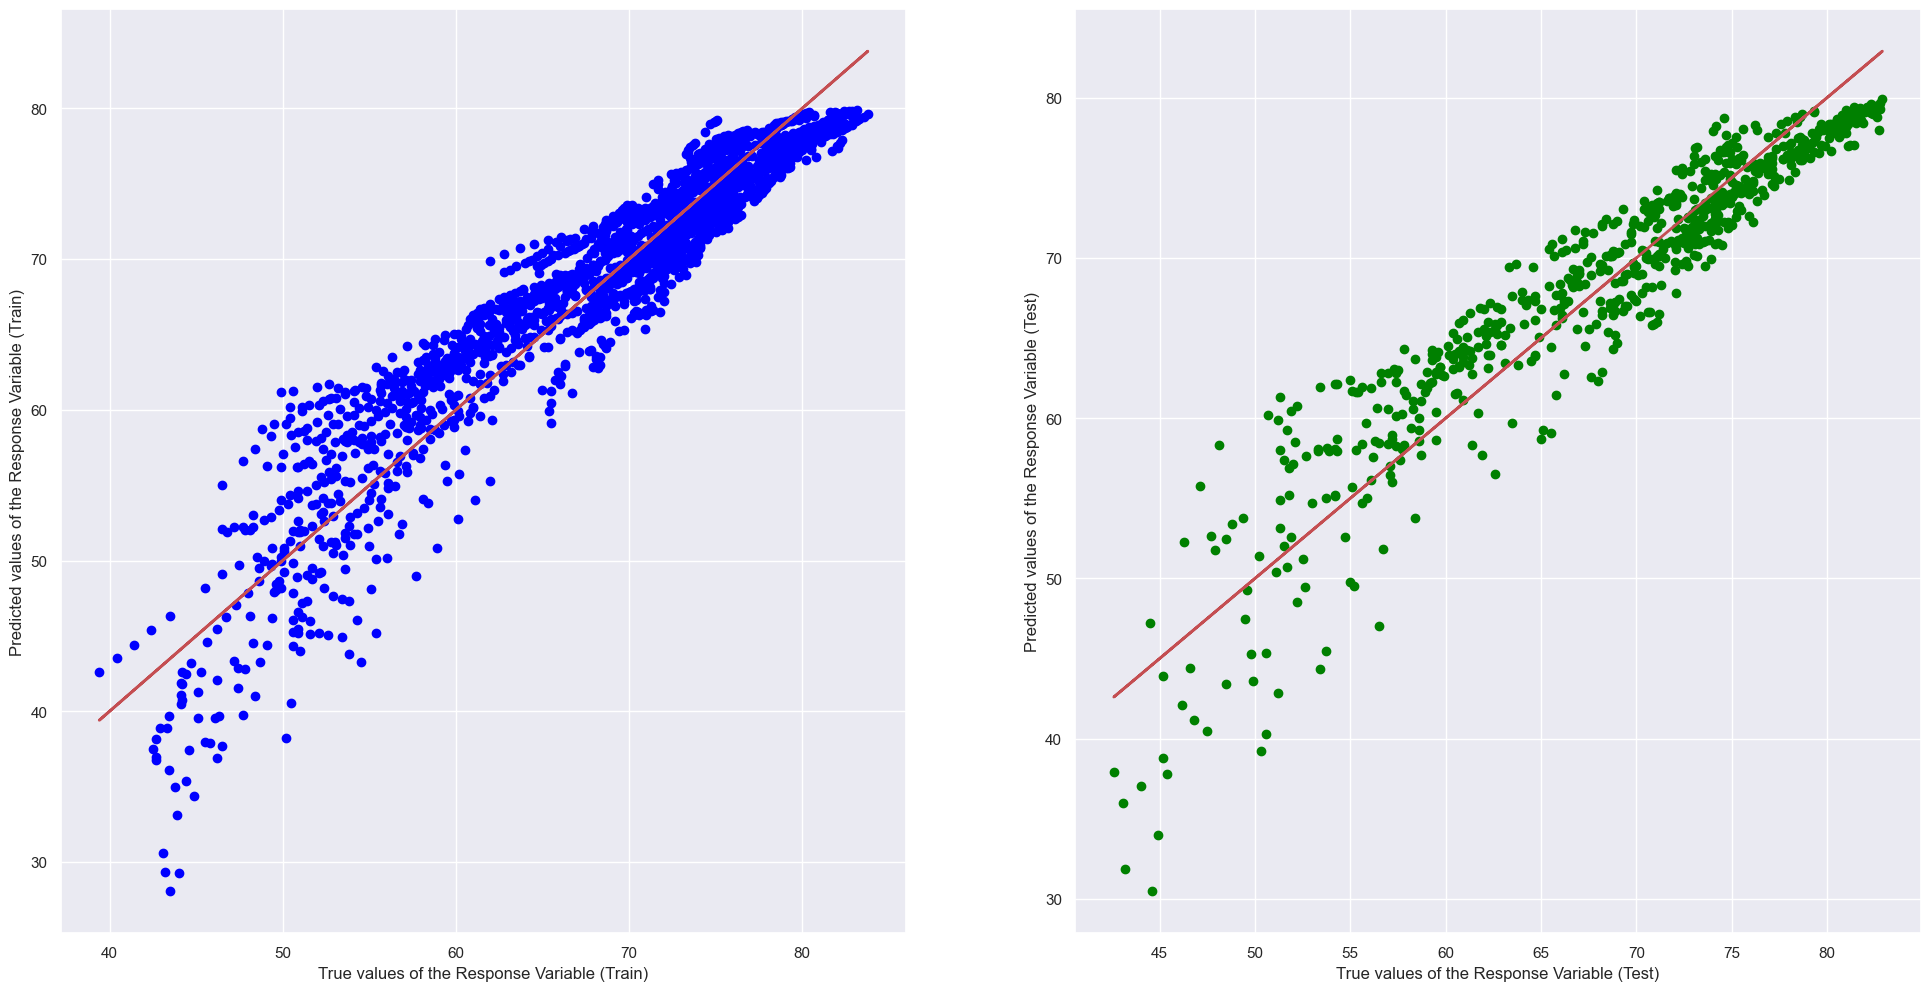

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8973516627271124
Mean Squared Error (MSE) 	: 9.177842586047452

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8822396962842087
Mean Squared Error (MSE) 	: 10.067155561221155



In [110]:
# Independent/Predictor Variables:
x = pd.DataFrame(LifeData_Clean[["Adult_mortality"]])

# Dependent/Response Variable:
y = pd.DataFrame(LifeData_Clean["Life_expectancy"])       

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 69)
lm = LinearRegression()
linreg = lm.fit(x_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.savefig("LinearReg.pdf")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


First, we try a multivariate linear regression with top 3 highest correlated variables: Under-five deaths, BMI and Schooling. We do not use infant deaths, as it will be a subset of Under-five deaths.

Intercept of Regression 	: b =  [79.1168824]
Coefficients of Regression 	: a =  [[-0.04859266 -0.07626261  0.31120729]]

          Predictors  Coefficients
0    Adult_mortality     -0.048593
1  Under_five_deaths     -0.076263
2          Schooling      0.311207



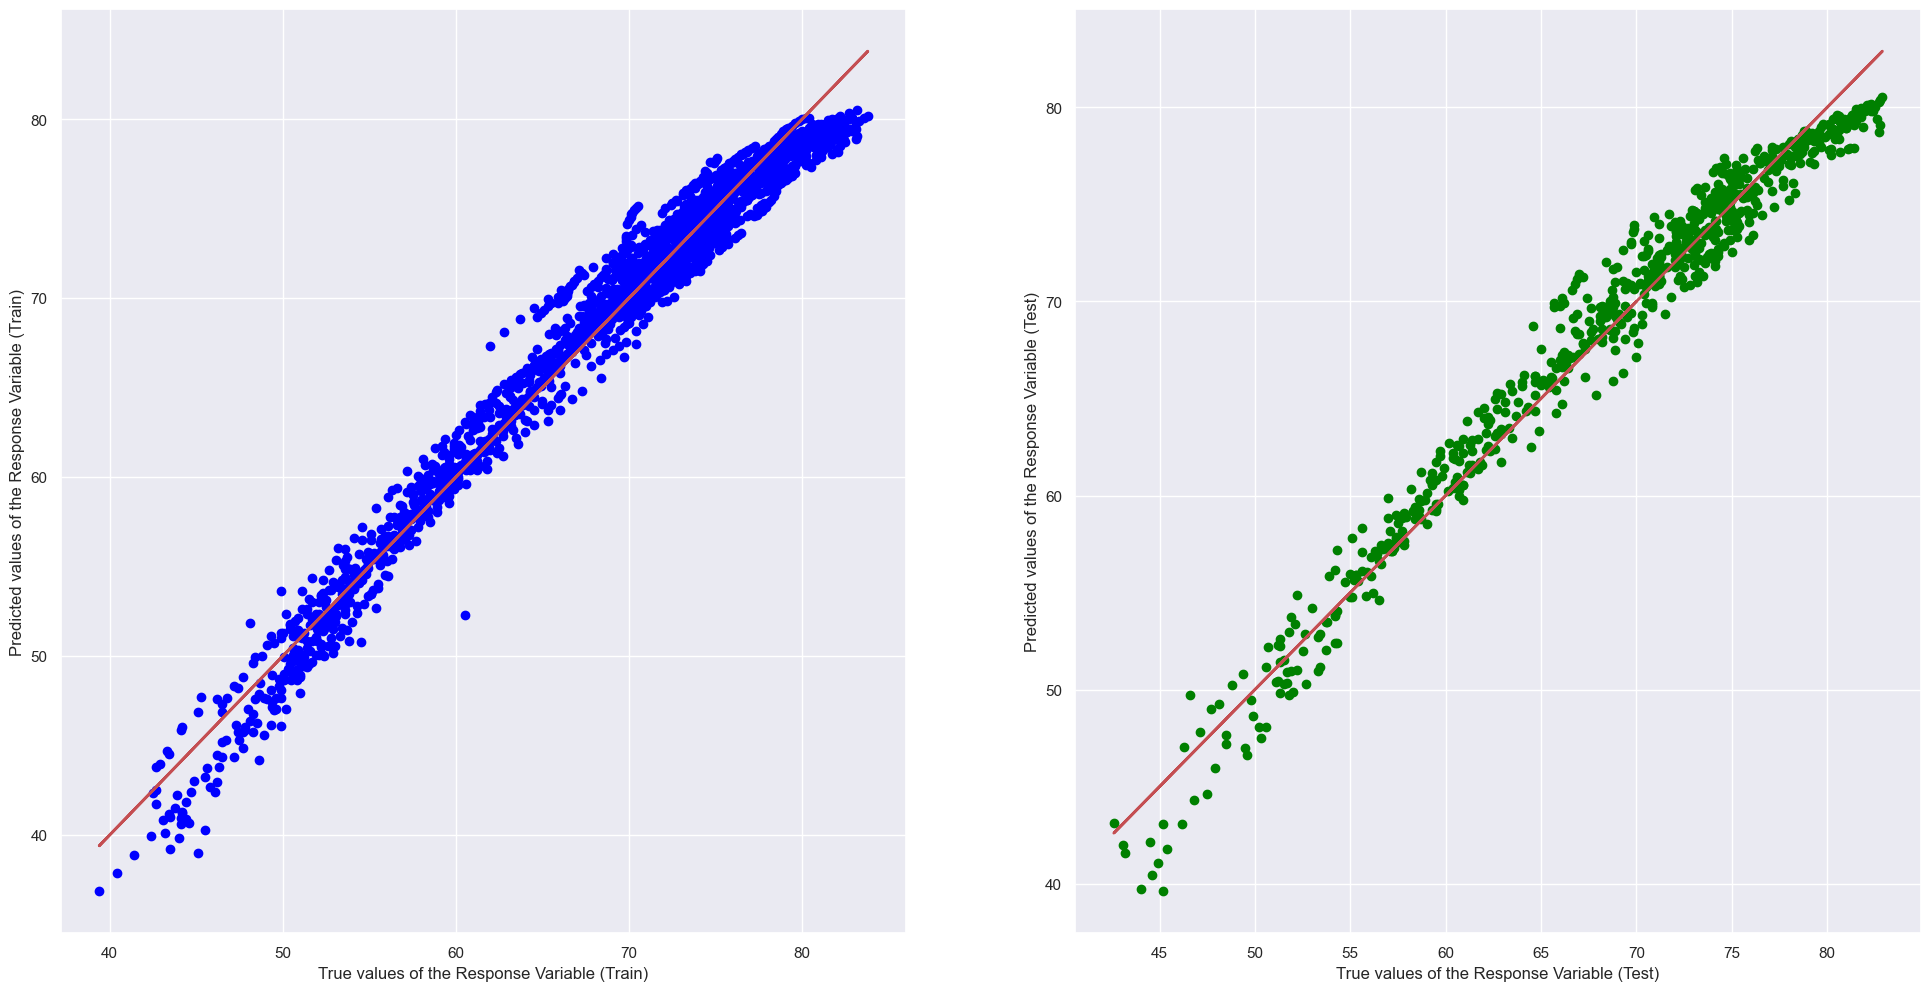

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9724567113578008
Mean Squared Error (MSE) 	: 2.462660128513758

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9708308536314382
Mean Squared Error (MSE) 	: 2.493627519754462



In [111]:
# Independent/Predictor Variables:
x = pd.DataFrame(LifeData_Clean[["Adult_mortality", "Under_five_deaths", "Schooling"]])

# Dependent/Response Variable:
y = pd.DataFrame(LifeData_Clean["Life_expectancy"])       

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 69)
lm = LinearRegression()
linreg = lm.fit(x_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [78.19295432]
Coefficients of Regression 	: a =  [[-0.04598186 -0.07572749  0.18100785  0.00134932 -0.22140317  0.81228923]]

               Predictors  Coefficients
0         Adult_mortality     -0.045982
1       Under_five_deaths     -0.075727
2               Schooling      0.181008
3  Essential_Immunization      0.001349
4                     BMI     -0.221403
5          GDP_per_capita      0.812289

Life_expectancy = -0.045824 * Adult_mortality - 0.083853 * Under_five_deaths + 0.203795 * Schooling + 0.002343 * Essential_Immunization - 0.127766 * BMI + 0.000044 * GDP_per_capita


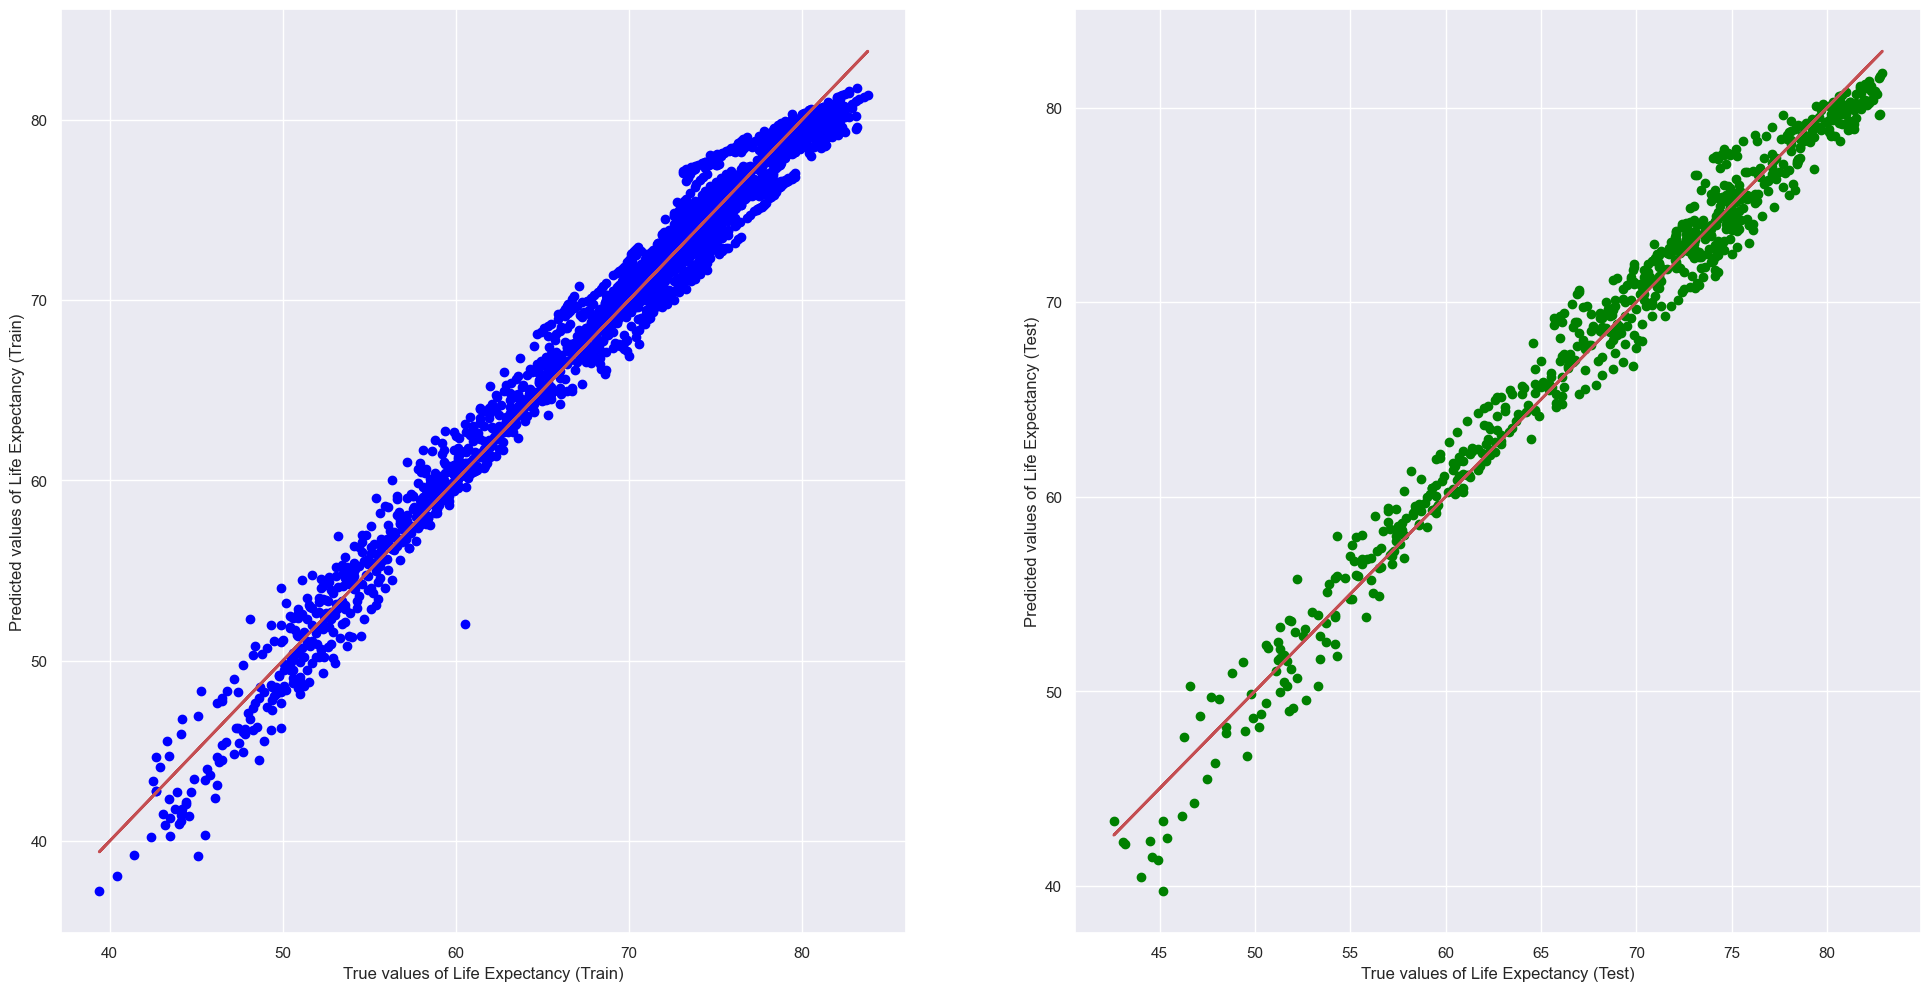

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9778445835477654
Mean Squared Error (MSE) 	: 1.9809276022305675

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9761597507537367
Mean Squared Error (MSE) 	: 2.038067924482045



In [112]:
# Independent/Predictor Variables:
x = pd.DataFrame(LifeData_Clean[["Adult_mortality", "Under_five_deaths", "Schooling","Essential_Immunization", "BMI", "GDP_per_capita"]])

# Dependent/Response Variable:
y = pd.DataFrame(LifeData_Clean["Life_expectancy"])       

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 69)
lm = LinearRegression()
linreg = lm.fit(x_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

print("Life_expectancy = -0.045824 * Adult_mortality - 0.083853 * Under_five_deaths + 0.203795 * Schooling + 0.002343 * Essential_Immunization - 0.127766 * BMI + 0.000044 * GDP_per_capita")

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of Life Expectancy (Train)")
axes[0].set_ylabel("Predicted values of Life Expectancy (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of Life Expectancy (Test)")
axes[1].set_ylabel("Predicted values of Life Expectancy (Test)")

plt.savefig("LinearReg.pdf")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

r2testscore = pd.DataFrame()
r2testscore["Linear_Regression"] = [linreg.score(x_test, y_test)]

## Model 2: Decision Tree Classifier and Regressor

A decision tree classifier can be used in classifying categorical data like economic status (Developing/Developed).

A decision tree regressor can be used to predict continous variables like life expectancy.

Train Set : (2291, 1) (2291, 1)
Test Set  : (573, 1) (573, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9052815364469664

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.912739965095986



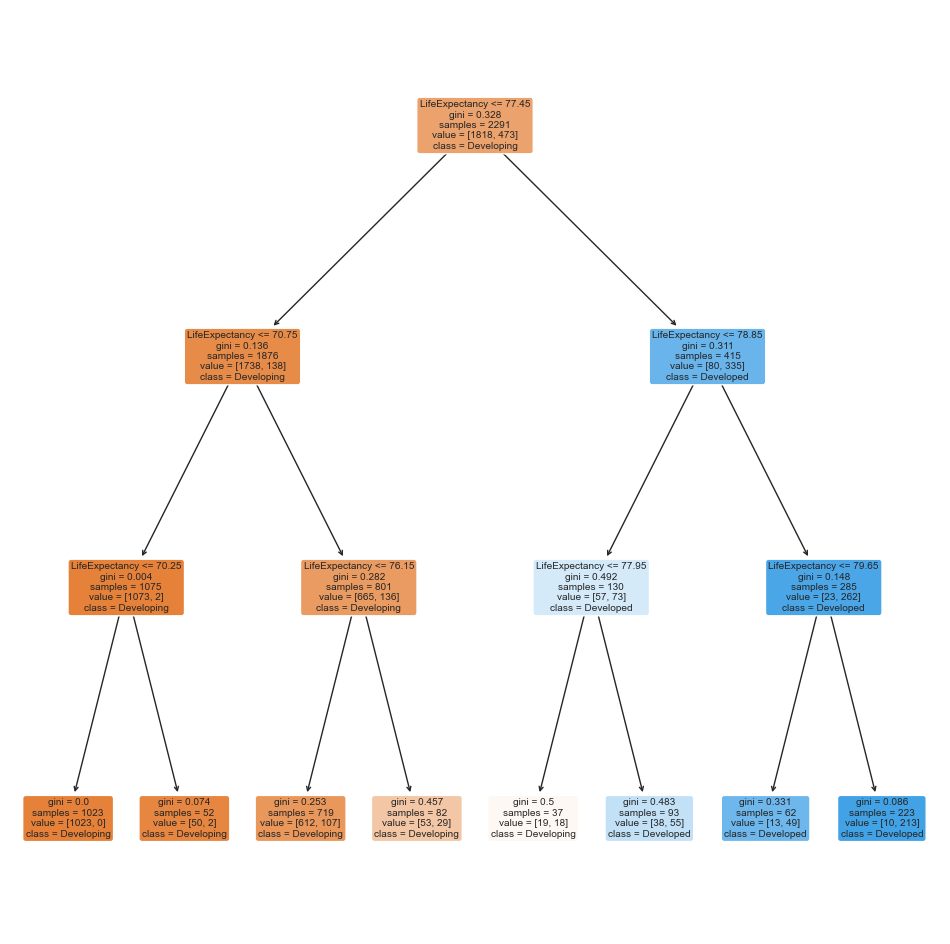

In [113]:
LifeExpectancy=pd.DataFrame(LifeData_Clean['Life_expectancy'])
Developed=pd.DataFrame(LifeData_Clean['Economy_status_Developed'])

X_train, X_test, y_train, y_test = train_test_split(LifeExpectancy,Developed, test_size = 0.2,random_state=0)
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

dectree = DecisionTreeClassifier(max_depth = 3)

dectree.fit(X_train,y_train)

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, feature_names=["LifeExpectancy"], class_names=["Developing","Developed"])

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Checking the accuracy of the Model: Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

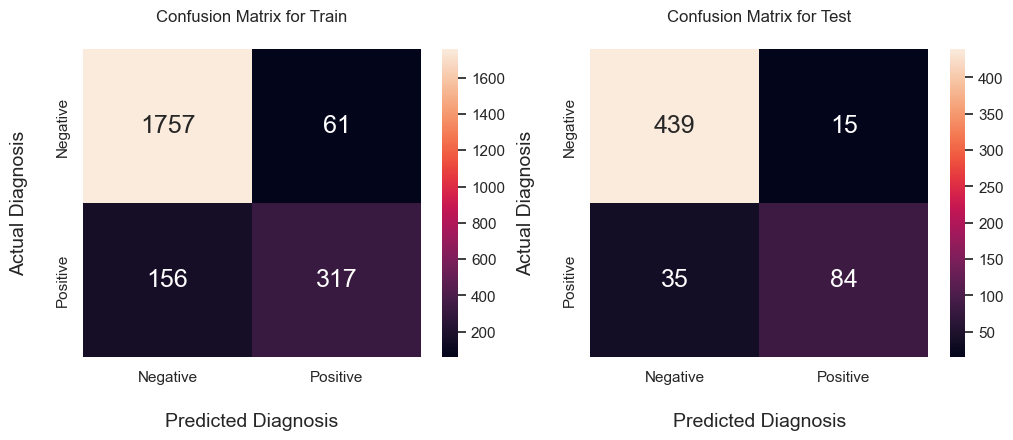

True Positive Rate Train :	 67.02%
True Negative Rate Train :	 96.64%
False Positive Rate Train :	 3.36%
False Negative Rate Train :	 32.98%

True Positive Rate Test :	 70.59%
True Negative Rate Test :	 96.70%
False Positive Rate Test :	 3.30%
False Negative Rate Test :	 29.41%


In [114]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
ax1 = sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
ax2 = sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1],)

# set x-axis label and ticks. 
ax1.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax1.xaxis.set_ticklabels(['Negative', 'Positive'])
ax2.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax2.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax1.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax1.yaxis.set_ticklabels(['Negative', 'Positive'])
ax2.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax2.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax1.set_title("Confusion Matrix for Train", fontsize=12, pad=20)
ax2.set_title("Confusion Matrix for Test", fontsize=12, pad=20)

plt.show()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("True Positive Rate Train :\t {0:.2%}".format(tpTrain/(tpTrain + fnTrain)))
print("True Negative Rate Train :\t {0:.2%}".format(tnTrain/(tnTrain + fpTrain)))
print("False Positive Rate Train :\t {0:.2%}".format(fpTrain/(tnTrain + fpTrain)))
print("False Negative Rate Train :\t {0:.2%}".format(fnTrain/(tpTrain + fnTrain)))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)
print("True Positive Rate Test :\t {0:.2%}".format(tpTest/(tpTest + fnTest)))
print("True Negative Rate Test :\t {0:.2%}".format(tnTest/(tnTest + fpTest)))
print("False Positive Rate Test :\t {0:.2%}".format(fpTest/(tnTest + fpTest)))
print("False Negative Rate Test :\t {0:.2%}".format(fnTest/(tpTest + fnTest)))

We can also use a decision tree regressor to predict continous variables like life expectancy, instead of just categorical variables like status of developing countries.

Train Set : (2291, 6) (2291, 1)
Test Set  : (573, 6) (573, 1)
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9654453071403796
Mean Squared Error (MSE) 	: 3.0812719096476293

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9526926871172785
Mean Squared Error (MSE) 	: 4.041507750361048



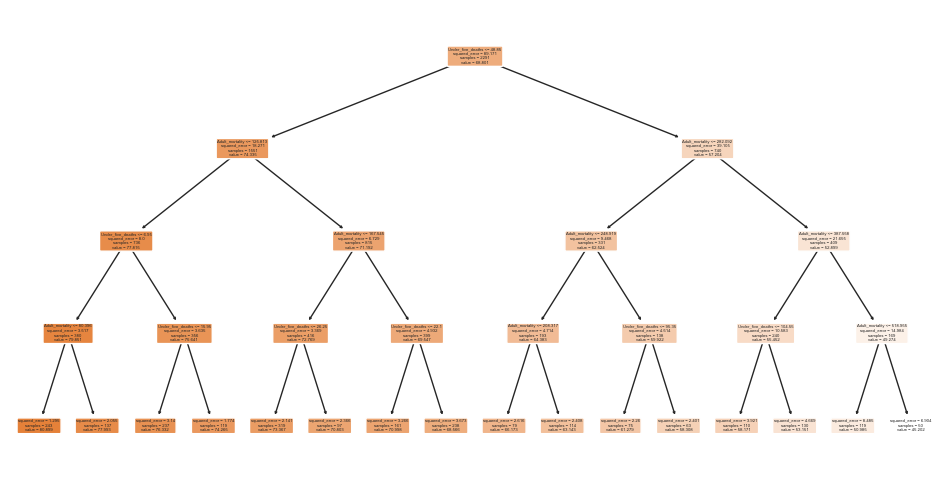

In [115]:
LifeExpectancy=pd.DataFrame(LifeData_Clean['Life_expectancy'])
Predictors=pd.DataFrame(LifeData_Clean[["Adult_mortality", "Under_five_deaths", "Schooling","Essential_Immunization", "BMI", "GDP_per_capita"]])

X_train, X_test, y_train, y_test = train_test_split(Predictors, LifeExpectancy, test_size = 0.2,random_state=0)
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

dtreg = DecisionTreeRegressor(max_depth = 4)
dtreg.fit(X_train, y_train)

f = plt.figure(figsize=(12,6))
plot_tree(dtreg, filled=True, rounded=True, feature_names=["Adult_mortality", "Under_five_deaths", "Schooling","Essential_Immunization", "BMI", "GDP_per_capita"], class_names=["Life Expectancy"])
plt.savefig('DecisionTreeRegression_out.pdf') # Higher resolution image for checking

y_train_pred = dtreg.predict(X_train)
y_test_pred = dtreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", dtreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", dtreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

r2testscore["DecTree_Regression"] = [dtreg.score(X_test, y_test)]

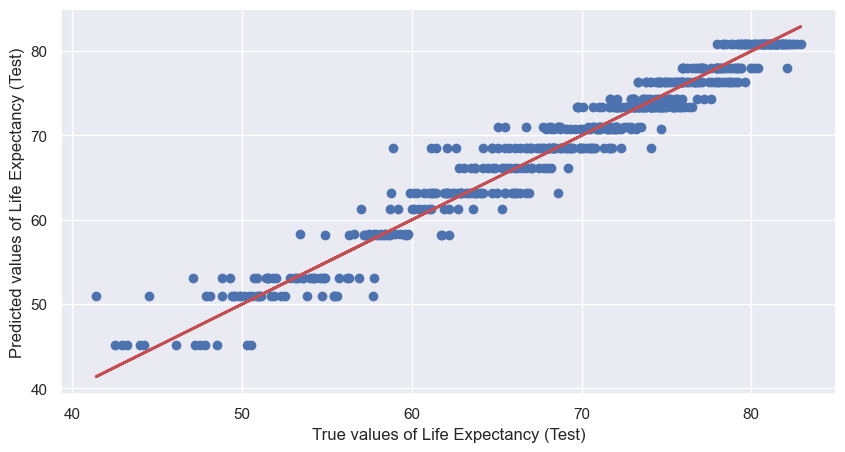

In [116]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_test_pred)
plt.plot(y_test, y_test, 'r-', linewidth = 2) # Perfect predictions
plt.xlabel("True values of Life Expectancy (Test)")
plt.ylabel("Predicted values of Life Expectancy (Test)")

plt.savefig('DTR.pdf')

As this is a regression model, Precision and Recall i.e. the confusion matrix, cannot be used in this case as the variables are continuous.

## Model 3: Random Forest Regressor

Let's see if we can improve on the results of our decision tree using a random forest model, as the true positive rate for our model is still low for both the train and test data.

In [117]:
LifeExpectancy=pd.DataFrame(LifeData_Clean['Life_expectancy'])
Predictors=pd.DataFrame(LifeData_Clean[["Adult_mortality", "Under_five_deaths", "Schooling","Essential_Immunization", "BMI", "GDP_per_capita"]])

X_train, X_test, y_train, y_test = train_test_split(Predictors, LifeExpectancy, test_size = 0.2,random_state=0)
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Transforming y_train from DataFrame to Series as 1d array is expected by RandomForestClassifier
y_train = y_train.squeeze()

Train Set : (2291, 6) (2291, 1)
Test Set  : (573, 6) (573, 1)


In [118]:
# Create the Random Forest object
rforestreg = RandomForestRegressor(max_depth = 10, n_estimators = 100)

# Fit Random Forest on Train Data
rf = rforestreg.fit(X_train, y_train.ravel())
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [119]:
# Predict the Response corresponding to Predictors
y_train_pred = rforestreg.predict(X_train)
y_test_pred = rforestreg.predict(X_test)

# Print the Classification Accuracy
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rforestreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rforestreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

r2testscore["RandForest_Regression"] = [rforestreg.score(X_test, y_test)]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9982089114563816
Mean Squared Error (MSE) 	: 0.1597129177088541

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9927543759994754
Mean Squared Error (MSE) 	: 0.619000399090895


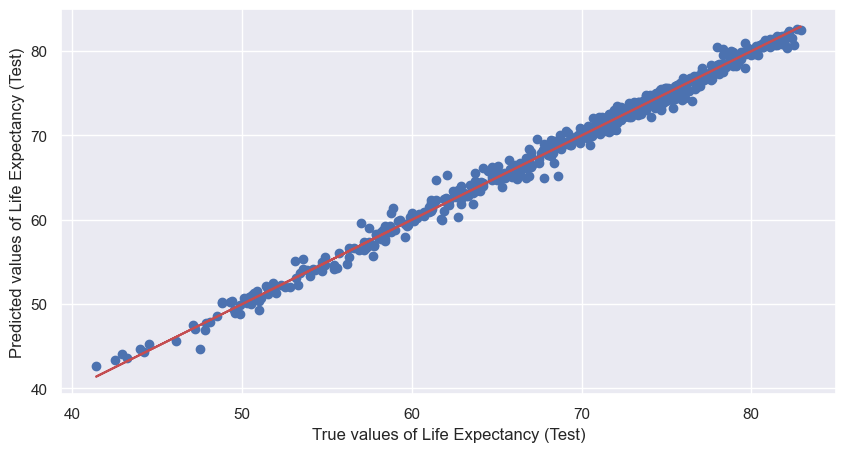

In [120]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_test_pred)
plt.xlabel("True values of Life Expectancy (Test)")
plt.ylabel("Predicted values of Life Expectancy (Test)")
plt.plot(y_test,y_test,'r-')

plt.savefig('RFR.pdf')

As this is a regression model, Precision and Recall i.e. the confusion matrix, cannot be used in this case as the variables are continuous.

## Model 4: K-Neighbours Regressor

In [121]:
from sklearn.neighbors import KNeighborsRegressor

LifeExpectancy=pd.DataFrame(LifeData_Clean['Life_expectancy'])
Predictors=pd.DataFrame(LifeData_Clean[["Adult_mortality", "Under_five_deaths", "Schooling","Essential_Immunization", "BMI", "GDP_per_capita"]])

X_train, X_test, y_train, y_test = train_test_split(Predictors, LifeExpectancy, test_size = 0.2,random_state=0)

# Fit the KNN model on train data
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

# Predict test data using the trained model
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", knn.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", knn.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

r2testscore["KN_Regression"] = [knn.score(X_test, y_test)]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9934191658807068
Mean Squared Error (MSE) 	: 0.5868186817983411

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9879881736384388
Mean Squared Error (MSE) 	: 1.0261815008726003



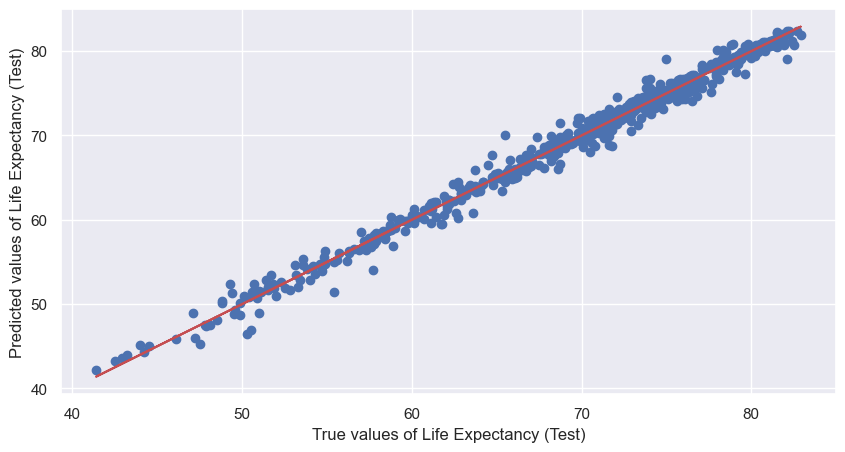

In [122]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_test_pred)
plt.plot(y_test,y_test,'r')
plt.xlabel("True values of Life Expectancy (Test)")
plt.ylabel("Predicted values of Life Expectancy (Test)")

plt.savefig('K-Neighbours.pdf')

## Model 5: Multi-Layer Perceptron Regressor

First we will use a Multi-Layer Perceptron Regressorm using the 'tanh' activation function.

In [123]:
from sklearn.neural_network import MLPRegressor

LifeExpectancy=pd.DataFrame(LifeData_Clean['Life_expectancy'])
Predictors=pd.DataFrame(LifeData_Clean[["Adult_mortality", "Under_five_deaths", "Schooling","Essential_Immunization", "BMI", "GDP_per_capita"]])

X_train, X_test, y_train, y_test = train_test_split(Predictors, LifeExpectancy, test_size = 0.2,random_state=0)
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

y_train = y_train.squeeze()
regr = MLPRegressor(max_iter = 1000, random_state = 1, hidden_layer_sizes=(100), activation='tanh').fit(X_train, y_train)

y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

print()
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regr.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regr.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Train Set : (2291, 6) (2291, 1)
Test Set  : (573, 6) (573, 1)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9796054524555637
Mean Squared Error (MSE) 	: 1.8185994797852405

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9768091097765146
Mean Squared Error (MSE) 	: 1.9812193266682228


First we will use a Multi-Layer Perceptron Regressorm using the 'logistic' activation function.

In [124]:
LifeExpectancy=pd.DataFrame(LifeData_Clean['Life_expectancy'])
Predictors=pd.DataFrame(LifeData_Clean[["Adult_mortality", "Under_five_deaths", "Schooling","Essential_Immunization", "BMI", "GDP_per_capita"]])

X_train, X_test, y_train, y_test = train_test_split(Predictors, LifeExpectancy, test_size = 0.2,random_state=0)
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

y_train = y_train.squeeze()
regr = MLPRegressor(max_iter = 1000, random_state = 1, hidden_layer_sizes=(100), activation='logistic').fit(X_train, y_train)

y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

print()
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regr.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regr.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

r2testscore["MLP_Regression"] = [regr.score(X_test, y_test)]

Train Set : (2291, 6) (2291, 1)
Test Set  : (573, 6) (573, 1)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9822062332095572
Mean Squared Error (MSE) 	: 1.586685605945052

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9802365164078816
Mean Squared Error (MSE) 	: 1.6884127895764194


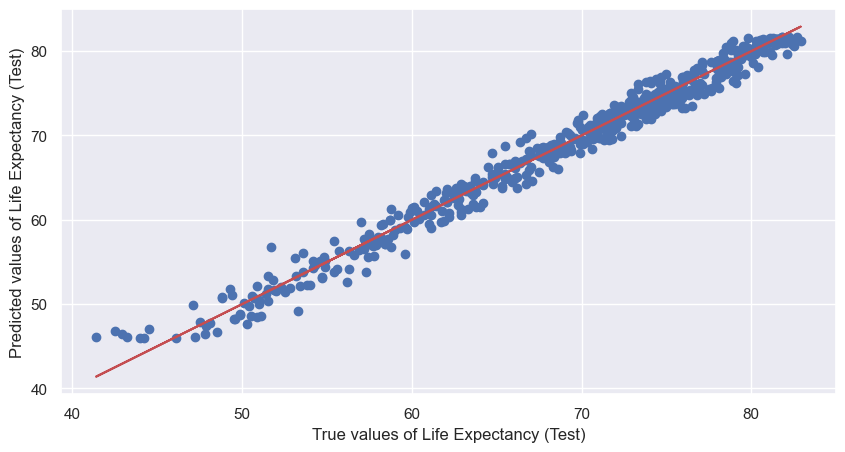

In [125]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_test_pred)
plt.plot(y_test,y_test,'r-')
plt.xlabel("True values of Life Expectancy (Test)")
plt.ylabel("Predicted values of Life Expectancy (Test)")

plt.savefig('MLP2.pdf')

'f, ax = plt.subplots(figsize=(12, 6))\nax.set_title("Model Accuracy", fontsize=20, color = \'w\')\nax.set_ylabel("Models", fontsize=14, labelpad=20, color = \'w\')\nax.set_xlabel("R-Squared Values", fontsize=14, labelpad=20, color = \'w\')\n\n\nsb.barplot(data=r2testscore, color="b", orient = \'h\', palette = \'mako\')\nfor bars in ax.containers:\n    ax.bar_label(bars, fmt=\'%.3f\', color = \'w\')\n\nax.set(yticklabels=[\'Linear Regression\', \'Decision Tree\', \'Random Forest\', \'K-Neighbours\', \'Multi-Layer Perceptron\'])\nax.grid(False)\nax.tick_params(colors=\'w\', which=\'both\')\n\nplt.savefig("r2testscorealt.png", transparent=True, bbox_inches="tight")'

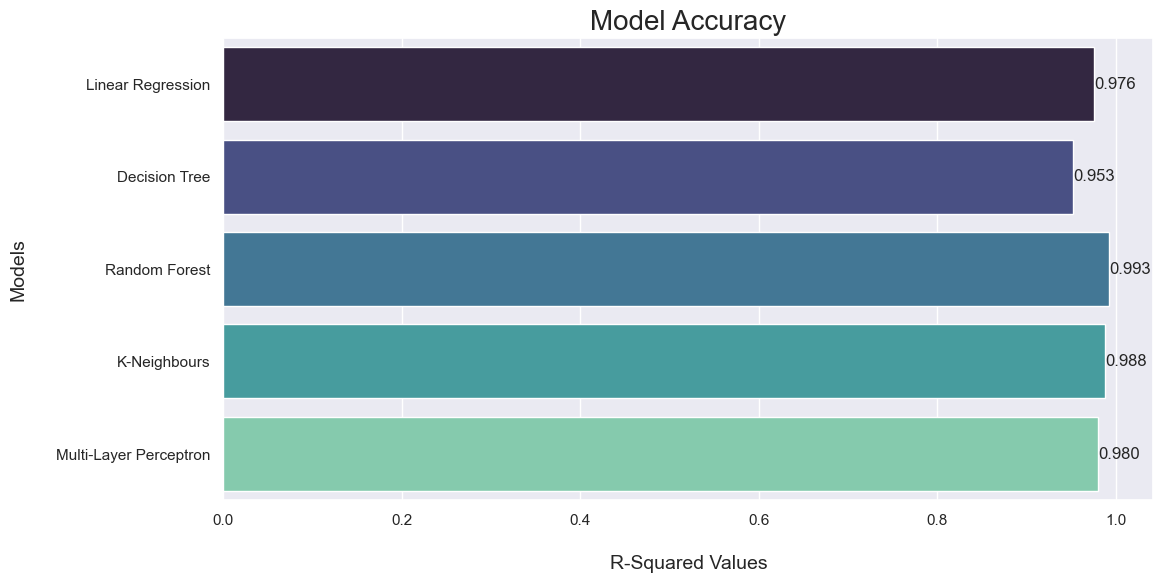

In [126]:
f, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Model Accuracy", fontsize=20)
ax.set_ylabel("Models", fontsize=14, labelpad=20)
ax.set_xlabel("R-Squared Values", fontsize=14, labelpad=20)


sb.barplot(data=r2testscore, color="b", orient = 'h', palette = 'mako')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.3f',)

ax.set(yticklabels=['Linear Regression', 'Decision Tree', 'Random Forest', 'K-Neighbours', 'Multi-Layer Perceptron'])

plt.savefig("r2testscorealt.png", bbox_inches="tight")

# Version to Generate Transparent Background PNG image for table. (Used in Slides.)
'''f, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Model Accuracy", fontsize=20, color = 'w')
ax.set_ylabel("Models", fontsize=14, labelpad=20, color = 'w')
ax.set_xlabel("R-Squared Values", fontsize=14, labelpad=20, color = 'w')


sb.barplot(data=r2testscore, color="b", orient = 'h', palette = 'mako')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.3f', color = 'w')

ax.set(yticklabels=['Linear Regression', 'Decision Tree', 'Random Forest', 'K-Neighbours', 'Multi-Layer Perceptron'])
ax.grid(False)
ax.tick_params(colors='w', which='both')

plt.savefig("r2testscorealt.png", transparent=True, bbox_inches="tight")'''